In [129]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://developer.spotify.com/assets/echonest-spotify.png")

In [ ]:
# Need only first time
#conda install -c conda-forge python-dotenv
#conda install -c conda-forge pydot

In [1]:
%matplotlib inline

import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import librosa
import librosa.display
import plotly
import plotly.express as px
import plotly.io as pio
import plotly.offline as pyo
import seaborn as sns

import sys
import pathlib
sys.path.insert(1, './fma_metadata/')
import utils
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (13, 5)

### Loading datasets

- genres.csv: contains metadata about genres;
- features.csv: contains high-level features extracted directly from the audio files;
- echonest.csv: contains mid-level features for each track, provided by echonest;
- tracks.csv: contains metadata about tracks, albums and artists;

In [2]:
# Load metadata and features.
genres = utils.load('/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/genres.csv')
features = utils.load('/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/features.csv')
echonest = utils.load('/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/echonest.csv')
tracks = utils.load('/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/tracks.csv')


np.testing.assert_array_equal(features.index, tracks.index)
assert echonest.index.isin(tracks.index).all()

tracks.shape, genres.shape, features.shape, echonest.shape

((106574, 52), (163, 4), (106574, 518), (13129, 249))

# 1. Tracks 

#### Data available (%) - tracks.csv - partition: "track"

In [3]:
# checks percentage of available data
print('Available data - track subset - Tracks.csv (%)')
((abs(tracks['track'].isnull().sum()-tracks.shape[0])/tracks.shape[0])*100).round(2).sort_values(ascending=False)

Available data - track subset - Tracks.csv (%)


bit_rate         100.00
genres           100.00
tags             100.00
number           100.00
listens          100.00
interest         100.00
comments         100.00
genres_all       100.00
title            100.00
favorites        100.00
duration         100.00
date_created     100.00
license           99.92
genre_top         46.54
language_code     14.10
date_recorded      5.78
composer           3.44
information        2.20
publisher          1.19
lyricist           0.29
dtype: float64

#### Data available (%) - tracks.csv - partition: "album"

In [4]:
print('Available data - album subset - Tracks.csv (%)')
((abs(tracks['album'].isnull().sum()-tracks.shape[0])/tracks.shape[0])*100).round(2).sort_values(ascending=False)

Available data - album subset - Tracks.csv (%)


comments         100.00
favorites        100.00
id               100.00
listens          100.00
tags             100.00
tracks           100.00
title             99.04
date_created      96.69
type              93.89
information       78.02
date_released     65.96
producer          16.95
engineer          14.35
dtype: float64

#### Data available (%) - tracks.csv - partition: "artist"

In [5]:
print('Available data - artist subset - Tracks.csv (%)')
((abs(tracks['artist'].isnull().sum()-tracks.shape[0])/tracks.shape[0])*100).round(2).sort_values(ascending=False)

Available data - artist subset - Tracks.csv (%)


name                 100.00
comments             100.00
favorites            100.00
id                   100.00
tags                 100.00
date_created          99.20
website               74.37
bio                   66.77
location              65.88
members               43.96
latitude              41.80
longitude             41.80
active_year_begin     21.31
associated_labels     13.39
related_projects      12.34
wikipedia_page         5.24
active_year_end        5.04
dtype: float64

In [6]:
tracks['track'].describe()

bit_rate       comments       duration      favorites  \
count  106574.000000  106574.000000  106574.000000  106574.000000   
mean   263274.695048       0.031621     277.849100       3.182521   
std     67623.443584       0.321993     305.518553      13.513820   
min        -1.000000       0.000000       0.000000       0.000000   
25%    192000.000000       0.000000     149.000000       0.000000   
50%    299914.000000       0.000000     216.000000       1.000000   
75%    320000.000000       0.000000     305.000000       3.000000   
max    448000.000000      37.000000   18350.000000    1482.000000   

           interest        listens         number  
count  1.065740e+05  106574.000000  106574.000000  
mean   3.541310e+03    2329.353548       8.260945  
std    1.901743e+04    8028.070647      15.243271  
min    2.000000e+00       0.000000       0.000000  
25%    5.990000e+02     292.000000       2.000000  
50%    1.314000e+03     764.000000       5.000000  
75%    3.059000e+03    2018.000000       9.000000  
max    3.293557e+06  543252.000000     255.000000

In [7]:
tracks['album'].describe()

comments      favorites             id       listens  \
count  106574.000000  106574.000000  106574.000000  1.065740e+05   
mean        0.394946       1.286927   12826.933914  3.212031e+04   
std         2.268915       3.133035    6290.261805  1.478532e+05   
min        -1.000000      -1.000000      -1.000000 -1.000000e+00   
25%         0.000000       0.000000    7793.000000  3.361000e+03   
50%         0.000000       0.000000   13374.000000  8.982000e+03   
75%         0.000000       1.000000   18203.000000  2.363500e+04   
max        53.000000      61.000000   22940.000000  3.564243e+06   

              tracks  
count  106574.000000  
mean       19.721452  
std        39.943673  
min        -1.000000  
25%         7.000000  
50%        11.000000  
75%        17.000000  
max       652.000000

In [8]:
tracks['artist'].describe()

comments      favorites             id      latitude     longitude
count  106574.000000  106574.000000  106574.000000  44544.000000  44544.000000
mean        1.894702      30.041915   12036.770404     39.901626    -38.668642
std         6.297679     100.511408    6881.420867     18.240860     65.237220
min        -1.000000      -1.000000       1.000000    -45.878760   -157.526855
25%         0.000000       1.000000    6443.000000     39.271398    -79.997459
50%         0.000000       5.000000   12029.500000     41.387917    -73.554431
75%         1.000000      16.000000   18011.000000     48.856930      4.351710
max        79.000000     963.000000   24357.000000     67.286005    175.277000

In [9]:
# display partitions of tracks.csv
ipd.display(tracks['track'].head())
ipd.display(tracks['album'].head())
ipd.display(tracks['artist'].head())
ipd.display(tracks['set'].head())

bit_rate  comments   composer        date_created date_recorded  \
track_id                                                                    
2           256000         0        NaN 2008-11-26 01:48:12    2008-11-26   
3           256000         0        NaN 2008-11-26 01:48:14    2008-11-26   
5           256000         0        NaN 2008-11-26 01:48:20    2008-11-26   
10          192000         0  Kurt Vile 2008-11-25 17:49:06    2008-11-26   
20          256000         0        NaN 2008-11-26 01:48:56    2008-01-01   

          duration  favorites genre_top     genres         genres_all  \
track_id                                                                
2              168          2   Hip-Hop       [21]               [21]   
3              237          1   Hip-Hop       [21]               [21]   
5              206          6   Hip-Hop       [21]               [21]   
10             161        178       Pop       [10]               [10]   
20             311          0       NaN  [76, 103]  [17, 10, 76, 103]   

         information  interest language_code  \
track_id                                       
2                NaN      4656            en   
3                NaN      1470            en   
5                NaN      1933            en   
10               NaN     54881            en   
20               NaN       978            en   

                                                    license  listens lyricist  \
track_id                                                                        
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...     1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...      514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...     1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...    50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...      361      NaN   

          number publisher tags            title  
track_id                                          
2              3       NaN   []             Food  
3              4       NaN   []     Electric Ave  
5              6       NaN   []       This World  
10             1       NaN   []          Freeway  
20             3       NaN   []  Spiritual Level

comments        date_created date_released engineer  favorites  id  \
track_id                                                                       
2                0 2008-11-26 01:44:45    2009-01-05      NaN          4   1   
3                0 2008-11-26 01:44:45    2009-01-05      NaN          4   1   
5                0 2008-11-26 01:44:45    2009-01-05      NaN          4   1   
10               0 2008-11-26 01:45:08    2008-02-06      NaN          4   6   
20               0 2008-11-26 01:45:05    2009-01-06      NaN          2   4   

                                        information  listens producer tags  \
track_id                                                                     
2                                           <p></p>     6073      NaN   []   
3                                           <p></p>     6073      NaN   []   
5                                           <p></p>     6073      NaN   []   
10                                              NaN    47632      NaN   []   
20        <p> "spiritual songs" from Nicky Cook</p>     2710      NaN   []   

                         title  tracks   type  
track_id                                       
2         AWOL - A Way Of Life       7  Album  
3         AWOL - A Way Of Life       7  Album  
5         AWOL - A Way Of Life       7  Album  
10           Constant Hitmaker       2  Album  
20                       Niris      13  Album

active_year_begin active_year_end  \
track_id                                     
2               2006-01-01             NaT   
3               2006-01-01             NaT   
5               2006-01-01             NaT   
10                     NaT             NaT   
20              1990-01-01      2011-01-01   

                                          associated_labels  \
track_id                                                      
2                                                       NaN   
3                                                       NaN   
5                                                       NaN   
10        Mexican Summer, Richie Records, Woodsist, Skul...   
20                                                      NaN   

                                                        bio  comments  \
track_id                                                                
2         <p>A Way Of Life, A Collective of Hip-Hop from...         0   
3         <p>A Way Of Life, A Collective of Hip-Hop from...         0   
5         <p>A Way Of Life, A Collective of Hip-Hop from...         0   
10        <p><span style="font-family:Verdana, Geneva, A...         3   
20        <p>Songs written by: Nicky Cook</p>\n<p>VOCALS...         2   

                date_created  favorites  id   latitude            location  \
track_id                                                                     
2        2008-11-26 01:42:32          9   1  40.058324          New Jersey   
3        2008-11-26 01:42:32          9   1  40.058324          New Jersey   
5        2008-11-26 01:42:32          9   1  40.058324          New Jersey   
10       2008-11-26 01:42:55         74   6        NaN                 NaN   
20       2008-11-26 01:42:52         10   4  51.895927  Colchester England   

          longitude                                            members  \
track_id                                                                 
2        -74.405661  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...   
3        -74.405661  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...   
5        -74.405661  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...   
10              NaN                           Kurt Vile, the Violators   
20         0.891874                                       Nicky Cook\n   

                name                                   related_projects  \
track_id                                                                  
2               AWOL  The list of past projects is 2 long but every1...   
3               AWOL  The list of past projects is 2 long but every1...   
5               AWOL  The list of past projects is 2 long but every1...   
10         Kurt Vile                                                NaN   
20        Nicky Cook                                                NaN   

                                                       tags  \
track_id                                                      
2                                                    [awol]   
3                                                    [awol]   
5                                                    [awol]   
10                                      [philly, kurt vile]   
20        [instrumentals, experimental pop, post punk, e...   

                                          website wikipedia_page  
track_id                                                          
2         http://www.AzillionRecords.blogspot.com            NaN  
3         http://www.AzillionRecords.blogspot.com            NaN  
5         http://www.AzillionRecords.blogspot.com            NaN  
10                            http://kurtvile.com            NaN  
20                                            NaN            NaN

split  subset
track_id                  
2         training   small
3         training  medium
5         training   small
10        training   small
20        training   large

count    106574.000000
mean        277.849100
std         305.518553
min           0.000000
25%         149.000000
50%         216.000000
75%         305.000000
max       18350.000000
Name: (track, duration), dtype: float64

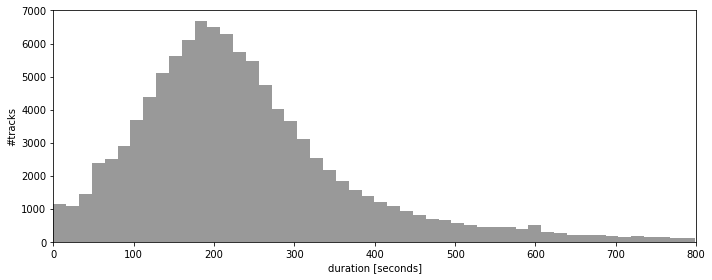

In [10]:
durations = tracks['track', 'duration']
plt.figure(figsize=(10, 4))  # Poster: (7, 3)
p = sns.distplot(durations[durations.values < 800], kde=False, rug=False, color='k', hist_kws=dict(alpha=0.4))
p.set_xlabel('duration [seconds]')
p.set_ylabel('#tracks')
p.set_xlim(0, 800)  # Poster: 500
plt.tight_layout()

durations.describe()

Common bit rates: [320000, 256000, 192000, 128000, 160000]
Average bit rate: 263 kbit/s


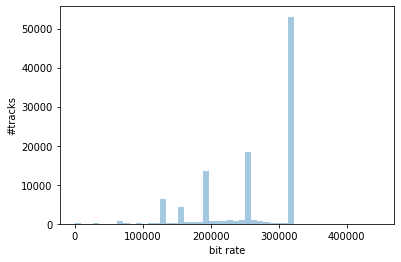

In [11]:
# Uncommon bit rates are VBR encodings.
print('Common bit rates: {}'.format(tracks['track', 'bit_rate'].value_counts().head(5).index.tolist()))
print('Average bit rate: {:.0f} kbit/s'.format(tracks['track', 'bit_rate'].mean()/1000))
p = sns.distplot(tracks['track', 'bit_rate'], kde=False, rug=False)
p.set_xlabel('bit rate')
p.set_ylabel('#tracks');

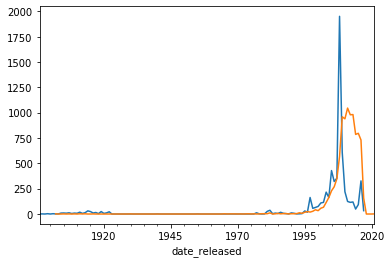

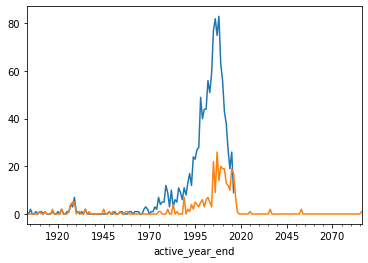

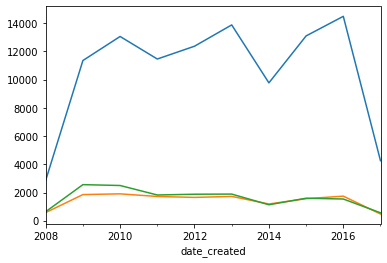

In [12]:
def plot(col0, col1):
    if col0 == 'track':
        d = tracks['track']
    if col0 in ['artist', 'album']:
        d = tracks[col0].drop_duplicates('id')
    d = pd.Series(1, index=d[col1])
    d.resample('A').sum().fillna(0).plot()

plt.figure()
plot('track', 'date_recorded')
plot('album', 'date_released')

plt.figure()
plot('artist', 'active_year_begin')
plot('artist', 'active_year_end')

plt.figure()
plot('track', 'date_created')
plot('album', 'date_created')
plot('artist', 'date_created')

(1902, 2021)

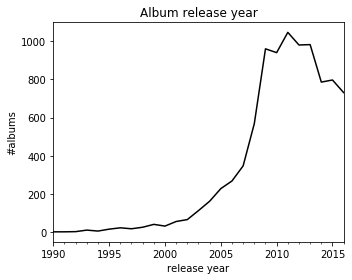

In [13]:
plt.figure(figsize=(5, 4))
d = tracks['album'].drop_duplicates('id')
d = pd.Series(1, index=d['date_released'])
d = d.resample('A').sum().fillna(0)
b = d.index >= pd.to_datetime(1990, format='%Y')
b &= d.index <= pd.to_datetime(2017, format='%Y')
d[b].plot(color='k')
plt.title('Album release year')
plt.xlabel('release year')
plt.ylabel('#albums')
plt.tight_layout()

d.index.min().year, d.index.max().year

###  1.1 Data cleaning & preparation - tracks.csv
1. all unnecessary rows were removed (after they've been carefully analysed)
2. <b>tracks_df</b> will be generated as "base dataset" for tracks

In [14]:
# extract year from date_created --> to new col: year_created in track
tracks['track','year_created']= pd.DatetimeIndex(tracks['track','date_created']).year
# remove col date_created
tracks.drop(('track','date_created'),axis=1, inplace=True)
#tracks['track'].head()

In [15]:
partitions=['track','artist','album']

for part in partitions:
    print(f"columns in partition {part}:\n {tracks[part].columns}\n")

columns in partition track:
 Index(['bit_rate', 'comments', 'composer', 'date_recorded', 'duration',
       'favorites', 'genre_top', 'genres', 'genres_all', 'information',
       'interest', 'language_code', 'license', 'listens', 'lyricist', 'number',
       'publisher', 'tags', 'title', 'year_created'],
      dtype='object')

columns in partition artist:
 Index(['active_year_begin', 'active_year_end', 'associated_labels', 'bio',
       'comments', 'date_created', 'favorites', 'id', 'latitude', 'location',
       'longitude', 'members', 'name', 'related_projects', 'tags', 'website',
       'wikipedia_page'],
      dtype='object')

columns in partition album:
 Index(['comments', 'date_created', 'date_released', 'engineer', 'favorites',
       'id', 'information', 'listens', 'producer', 'tags', 'title', 'tracks',
       'type'],
      dtype='object')



In [16]:
# generating new dataset with filtered columns
tracks_df = tracks[
    [('artist','name'),('track','title'),('track','year_created'),('track','duration'),
     ('track','listens'),('track','favorites'),('track','bit_rate'),('track','interest'),('track','license'),
     ('track','genre_top'),('track','genres_all'),('album','title'),('album','tracks'),('album','listens'),
    ('set','split'),('set','subset')]
      ]
# display final dataset 
tracks_df.head()

artist            track                                          \
                name            title year_created duration listens favorites   
track_id                                                                        
2               AWOL             Food         2008      168    1293         2   
3               AWOL     Electric Ave         2008      237     514         1   
5               AWOL       This World         2008      206    1151         6   
10         Kurt Vile          Freeway         2008      161   50135       178   
20        Nicky Cook  Spiritual Level         2008      311     361         0   

                                                                               \
         bit_rate interest                                            license   
track_id                                                                        
2          256000     4656  Attribution-NonCommercial-ShareAlike 3.0 Inter...   
3          256000     1470  Attribution-NonCommercial-ShareAlike 3.0 Inter...   
5          256000     1933  Attribution-NonCommercial-ShareAlike 3.0 Inter...   
10         192000    54881  Attribution-NonCommercial-NoDerivatives (aka M...   
20         256000      978  Attribution-NonCommercial-NoDerivatives (aka M...   

                                                      album                 \
         genre_top         genres_all                 title tracks listens   
track_id                                                                     
2          Hip-Hop               [21]  AWOL - A Way Of Life      7    6073   
3          Hip-Hop               [21]  AWOL - A Way Of Life      7    6073   
5          Hip-Hop               [21]  AWOL - A Way Of Life      7    6073   
10             Pop               [10]     Constant Hitmaker      2   47632   
20             NaN  [17, 10, 76, 103]                 Niris     13    2710   

               set          
             split  subset  
track_id                    
2         training   small  
3         training  medium  
5         training   small  
10        training   small  
20        training   large

In [17]:
# check missing values in tracks_df.csv
tracks_df.isnull().sum()

artist  name                0
track   title               1
        year_created        0
        duration            0
        listens             0
        favorites           0
        bit_rate            0
        interest            0
        license            87
        genre_top       56976
        genres_all          0
album   title            1025
        tracks              0
        listens             0
set     split               0
        subset              0
dtype: int64

In [18]:
# drop rows with missing title (album) as it is not possible to retreive it 
tracks_df.drop(index = tracks_df[tracks_df['album','title'].isnull()].index, inplace=True)
# drop single row with missing values in title (track)
tracks_df.drop(index = tracks_df[tracks_df['track','title'].isnull()].index, inplace=True)
# drop genre_top with missing values
tracks_df.drop(index = tracks_df[tracks_df['track','genre_top'].isnull()].index, inplace=True)

#check shape
tracks.shape

(106574, 52)

In [19]:
tracks['track'][['genre_top']].value_counts()

genre_top          
Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
dtype: int64

In [20]:
tracks_df.loc[(tracks_df['track','genre_top'] == 'Rock')]['artist','name'].value_counts()

Disco Missile        144
Obits                126
+HIRS+               100
King Ghidorah!        86
Glove Compartment     75
                    ... 
Sick of Sarah          1
i'dawn                 1
Ecstasy Mule           1
Dropdead               1
Holy Slouch            1
Name: (artist, name), Length: 2054, dtype: int64

In [129]:
tracks_df['artist','name'].value_counts().loc[lambda x : x>360]     

Kosta T              745
Podington Bear       604
Ergo Phizmiz         499
Blue Dot Sessions    416
Lee Rosevere         371
Name: (artist, name), dtype: int64

# 2.  Generes 

- Information about features

<b>top_level</b>: assigns a values based on the genre hierarchy. The lowest the number the oldest the genre (hence at the top of the hierarchy). Values with high number i.e. [genre_id: 1; title: Avant-Grade; top_level: 38] means that is derivative genre.

<b>parent</b>: every genre has its top_level "number", genres at the top of the hierarchical tree have parent = 0, while the derivatives genres have parent number = to the top_level of the genre they derive from.


In [392]:
genres.head()

#tracks  parent          title  top_level
genre_id                                           
1            8693      38    Avant-Garde         38
2            5271       0  International          2
3            1752       0          Blues          3
4            4126       0           Jazz          4
5            4106       0      Classical          5

In [393]:
genres.shape

(163, 4)

In [394]:
# check missing values
genres.isnull().sum()

#tracks      0
parent       0
title        0
top_level    0
dtype: int64

In [34]:
print(f"top level:\n{genres['top_level'].unique()}\n\nparent:\n{genres['parent'].unique()}")

top level:
[  38    2    3    4    5   20    8    9   10   14   12   13   15   17
 1235   21]

parent:
[  38    0   20   14    6 1235   12   17    4   15   65    2   45    9
   25   10   92   21   53   31   26   13   86    5  297  109   19  182
  181   85  468  651   46  130   18    3   79   16  102  763]


In [35]:
# grouping genres 
rootGen_lst = genres['title'][genres['parent']== 0].tolist()
rootTop_lev= genres['top_level'][genres['parent']== 0].tolist()
root_gen ={}

def GroupGenres(gen_lst, lev_lst, dict_out):
    for gen,level in zip(gen_lst,lev_lst):
        dict_out[level]=gen
    return dict_out

def GenTopGenres(x):
    for lev in rootTop_lev:
        for rows in x[x['top_level']==lev]:
            x.loc[x['top_level']==lev,'title_top'] = root_gen[lev]
        
print(GroupGenres(rootGen_lst, rootTop_lev,root_gen))
GenTopGenres(genres)
    

{2: 'International', 3: 'Blues', 4: 'Jazz', 5: 'Classical', 8: 'Old-Time / Historic', 9: 'Country', 10: 'Pop', 12: 'Rock', 13: 'Easy Listening', 14: 'Soul-RnB', 15: 'Electronic', 17: 'Folk', 20: 'Spoken', 21: 'Hip-Hop', 38: 'Experimental', 1235: 'Instrumental'}


In [36]:
genres.head()

#tracks  parent          title  top_level      title_top
genre_id                                                          
1            8693      38    Avant-Garde         38   Experimental
2            5271       0  International          2  International
3            1752       0          Blues          3          Blues
4            4126       0           Jazz          4           Jazz
5            4106       0      Classical          5      Classical

In [37]:
fig = px.sunburst(genres, path=['title_top', 'title'], color='title_top', title='Genres parent/child') 
fig.show()

In [38]:
# barchart in plotly - Top genres
barchart = px.bar(
data_frame=genres,
x='title_top',
y='#tracks',
color='title_top',
opacity=0.9,
orientation='v',
barmode='relative',
title="tracks per top-genre")
barchart

In [401]:
barchart = px.bar(
data_frame=genres,
x='title',
y='#tracks',
color='title',
opacity=0.9,
orientation='v',
barmode='relative',
title="tracks per genre")
barchart

# 3. Features 

<b>UNDERSTANDING FEATURES FOR SIGNAL RECOGNITION:</b>

1. <b>zcr</b>:  ZERO-CROSSING-RATE is the rate at which a signal changes from positive to zero to negative or from negative to zero to positive --> useful for classifying percussive sounds.

2. <b>tonnetz</b>:  is a conceptual lattice diagram representing tonal space; Tonnetz can be used to show traditional harmonic relationships in European classical music;

3. <b>chroma_cens</b>:  relates to the twelve different pitch classes; are a powerful tool for analyzing music whose pitches can be meaningfully categorized --> MAIN CHARACT: they capture harmonic and melodic characteristics of music, while being robust to changes in timbre and instrumentation;

4. <b>spectral_bandwidth</b>: is the wavelength interval over which the magnitude of all spectral components is equal to or greater than a specified fraction of the magnitude of the component having the maximum value;

5.  <b>spectral_centroid</b>: is a measure used in digital signal processing to characterise a spectrum. It indicates where the center of mass of the spectrum is located. Perceptually, it has a robust connection with the impression of brightness of a sound;

6. <b>spectral roll-off</b>: The roll-off frequency is defined as the frequency under which some percentage (cutoff) of the total energy of the spectrum is contained. The roll-off frequency can be used to distinguish between harmonic (below roll-off) and noisy sounds (above roll-off);

7. <b>spectral_contrast </b>: is defined as the decibel difference between peaks and valleys in the spectrum.

8. <b>MFCC </b> The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10-20) which concisely describe the overall shape of a spectral envelope. In MIR, it is often used to describe timbre.

In [41]:
print('{1} features for {0} tracks\n'.format(*features.shape))
columns = ['mfcc', 'chroma_cens', 'tonnetz', 'spectral_contrast']
columns.append(['spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff'])
columns.append(['rmse', 'zcr'])
for column in columns:
    print(f"****** {column} ******")
    ipd.display(features[column].head().style.format('{:.2f}'))

518 features for 106574 tracks

****** mfcc ******


****** chroma_cens ******


****** tonnetz ******


****** spectral_contrast ******


****** ['spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff'] ******


****** ['rmse', 'zcr'] ******


# 4. Echo-Nest

This dataset contains metrics provided by echonest. Those are private features computed using echonest algorithms.

<b>Features</b>: acousticness, danceability,	energy,	instrumentalness,	liveness,	speechiness,	tempo,	valence

<b>echo_df</b> will be used for classification purposes. The label "genre_top" will be taken from tracks.csv and added to this dataset. 
All features are normalized with a MinMaxScaler

## 4.1 echo-nest ---- partition: audio_features 

In [62]:
echo_df = echonest['echonest','audio_features'].copy()
echo_df.head()

acousticness  danceability    energy  instrumentalness  liveness  \
track_id                                                                     
2             0.416675      0.675894  0.634476          0.010628  0.177647   
3             0.374408      0.528643  0.817461          0.001851  0.105880   
5             0.043567      0.745566  0.701470          0.000697  0.373143   
10            0.951670      0.658179  0.924525          0.965427  0.115474   
134           0.452217      0.513238  0.560410          0.019443  0.096567   

          speechiness    tempo   valence  
track_id                                  
2            0.159310  165.922  0.576661  
3            0.461818  126.957  0.269240  
5            0.124595  100.260  0.621661  
10           0.032985  111.562  0.963590  
134          0.525519  114.290  0.894072

In [63]:
#normalize dataset
echo_df=(echo_df-echo_df.min())/(echo_df.max()-echo_df.min())
echo_df.head()

acousticness  danceability    energy  instrumentalness  liveness  \
track_id                                                                     
2             0.418434      0.680869  0.634492          0.010649  0.159523   
3             0.375988      0.520349  0.817487          0.001855  0.084377   
5             0.043750      0.756819  0.701489          0.000698  0.364224   
10            0.955687      0.661557  0.924557          0.967346  0.094422   
134           0.454126      0.503556  0.560421          0.019481  0.074625   

          speechiness     tempo   valence  
track_id                                   
2            0.145135  0.642706  0.576663  
3            0.465638  0.479206  0.269236  
5            0.108355  0.367184  0.621664  
10           0.011296  0.414608  0.963599  
134          0.533129  0.426055  0.894080

In [64]:
# Merge the relevant columns of tracks and echo_metrics
echo_df = echo_df.merge(tracks["track"][["genre_top"]],on="track_id")
# display dataset
echo_df.head()

acousticness  danceability    energy  instrumentalness  liveness  \
track_id                                                                     
2             0.418434      0.680869  0.634492          0.010649  0.159523   
3             0.375988      0.520349  0.817487          0.001855  0.084377   
5             0.043750      0.756819  0.701489          0.000698  0.364224   
10            0.955687      0.661557  0.924557          0.967346  0.094422   
134           0.454126      0.503556  0.560421          0.019481  0.074625   

          speechiness     tempo   valence genre_top  
track_id                                             
2            0.145135  0.642706  0.576663   Hip-Hop  
3            0.465638  0.479206  0.269236   Hip-Hop  
5            0.108355  0.367184  0.621664   Hip-Hop  
10           0.011296  0.414608  0.963599       Pop  
134          0.533129  0.426055  0.894080   Hip-Hop

In [67]:
# check NaN values
echo_df.isnull().sum()

acousticness           0
danceability           0
energy                 0
instrumentalness       0
liveness               0
speechiness            0
tempo                  0
valence                0
genre_top           3774
dtype: int64

In [68]:
# remove rows with NaN values
echo_df = echo_df.dropna()
# check shape
echo_df.shape

(9355, 9)

In [69]:
echo_df['genre_top'].value_counts()

Rock                   3892
Electronic             2170
Hip-Hop                 910
Folk                    874
Old-Time / Historic     357
Pop                     346
Classical               265
Jazz                    241
International           133
Instrumental             84
Blues                    66
Experimental             17
Country                   0
Easy Listening            0
Soul-RnB                  0
Spoken                    0
Name: genre_top, dtype: int64

In [71]:
# Create a correlation matrix
corr_metrics = echo_df.corr()
corr_metrics.style.background_gradient()

In [73]:
# statistics 
echo_df.describe()

acousticness  danceability       energy  instrumentalness     liveness  \
count   9355.000000   9355.000000  9355.000000       9355.000000  9355.000000   
mean       0.536793      0.455889     0.539622          0.655731     0.174229   
std        0.387842      0.208042     0.283062          0.357930     0.169531   
min        0.000000      0.000000     0.000000          0.000000     0.000000   
25%        0.106267      0.297652     0.318189          0.386345     0.080631   
50%        0.602851      0.445172     0.550833          0.848664     0.099382   
75%        0.934738      0.608557     0.786196          0.924762     0.204141   
max        1.000000      0.998080     1.000000          1.000000     0.991245   

       speechiness        tempo      valence  
count  9355.000000  9355.000000  9355.000000  
mean      0.083070     0.463567     0.433223  
std       0.145945     0.148110     0.275766  
min       0.000964     0.000000     0.000000  
25%       0.015893     0.348090     0.191425  
50%       0.029044     0.450929     0.408457  
75%       0.068721     0.561292     0.656774  
max       1.000000     0.995749     1.000000

In [75]:
# radar chart for genres
import plotly.graph_objects as go
from plotly.subplots import make_subplots

genr_lst = echo_df['genre_top'].unique().tolist()
colors = ["red", "green", "blue", "goldenrod", "magenta",'orange','purple','black','lightblue','coral','darkgreen','brown']

for genre,color in zip(genr_lst,colors):
    metr = echo_df[echo_df['genre_top']==genre].describe().loc['mean'].tolist()
    theta=['acousticness','danceability','energy','instrumentalness', 'liveness', 'tempo','speechiness','valence']
    
    fig = px.line_polar(echo_df, r=metr, theta=theta, line_close=True, title=genre,color_discrete_sequence=[color])
    fig.update_traces(fill='toself')
    fig.update_layout(
    title={
        'text': genre,
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

    fig.show()

In [163]:
# boxplots - echonest features
tempo = go.Box(y=echo_df['tempo'],name='tempo')
liveness = go.Box(y=echo_df['liveness'],name='liveness')
acousticness = go.Box(y=echo_df['acousticness'],name='acousticness')
danceability = go.Box(y=echo_df['danceability'],name='danceability')
energy = go.Box(y=echo_df['energy'],name='energy')
instrumentalness = go.Box(y=echo_df['instrumentalness'],name='instrumentalness')
speechiness = go.Box(y=echo_df['speechiness'],name='speechiness')
valence = go.Box(y=echo_df['valence'], name='valence')


data = [acousticness, danceability, energy, instrumentalness, liveness, speechiness, tempo, valence]
layout=go.Layout(title='Box-plots echonest features')
go.Figure(data=data, layout=layout)

## 4.2 echo-nest ---- partition: metadata

In [119]:
echonest['echonest','metadata'].head()

album_date         album_name  artist_latitude  \
track_id                                                   
2                NaN                NaN          32.6783   
3                NaN                NaN          32.6783   
5                NaN                NaN          32.6783   
10        2008-03-11  Constant Hitmaker          39.9523   
134              NaN                NaN          32.6783   

               artist_location  artist_longitude artist_name  \
track_id                                                       
2                  Georgia, US          -83.2230        AWOL   
3                  Georgia, US          -83.2230        AWOL   
5                  Georgia, US          -83.2230        AWOL   
10        Philadelphia, PA, US          -75.1624   Kurt Vile   
134                Georgia, US          -83.2230        AWOL   

                       release  
track_id                        
2         AWOL - A Way Of Life  
3         AWOL - A Way Of Life  
5         AWOL - A Way Of Life  
10           Constant Hitmaker  
134       AWOL - A Way Of Life

In [120]:
echonest['echonest','metadata'].isnull().sum()

album_date          10412
album_name          10257
artist_latitude      3359
artist_location      3359
artist_longitude     3359
artist_name             0
release                 0
dtype: int64

In [121]:
echo_metdat= echonest['echonest','metadata'].copy()
echo_metdat= echo_metdat.dropna()

In [122]:
geo_data.isnull().sum()

album_date          0
album_name          0
artist_latitude     0
artist_location     0
artist_longitude    0
artist_name         0
release             0
dtype: int64

In [123]:
echo_metdat.shape

(2068, 7)

In [124]:
echo_metdat.head()

album_date         album_name  artist_latitude  \
track_id                                                   
10        2008-03-11  Constant Hitmaker        39.952300   
142             2005     The Quiet Room        41.823900   
213             2007                 Au        45.507856   
256       2006-11-07          Black Elk        45.511800   
257       2006-11-07          Black Elk        45.511800   

               artist_location  artist_longitude  \
track_id                                           
10        Philadelphia, PA, US        -75.162400   
142         Providence, RI, US        -71.412000   
213           Portland, Oregon       -122.690794   
256           Portland, OR, US       -122.676000   
257           Portland, OR, US       -122.676000   

                                artist_name            release  
track_id                                                        
10                                Kurt Vile  Constant Hitmaker  
142       Alec K. Redfearn and the Eyesores     The Quiet Room  
213                                      AU                 Au  
256                               Black Elk          Black Elk  
257                               Black Elk          Black Elk

This dataset provided information regarding artist location (latitude, longitude). 
This pieace of info can be very useful for visualization purposes. 

In [125]:
#echonest['echonest','metadata']['artist_location'].unique()

In [126]:
# geo-scatter plot 
fig = px.scatter_geo(echo_metdat,
                     lat='artist_latitude',
                    lon='artist_longitude',
                     color="artist_location", # which column to use to set the color of markers
                     projection="natural earth",
                     title='Distribution of artists along the globe'
                    )
fig.show()

In [127]:
# histogram for artists
artist_plot = px.histogram(echo_metdat, x="artist_name",title='tracks per artist')
artist_plot.show()